## 4. Feature engineering

- create a few datasets with dummies and categogian approach
- generate new features
- save processed dataframes to folder ML, ...

In [1]:
import numpy as np
import pandas as pd
import glob
import re
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

import warnings
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline 


In [2]:
def to_dummies(df, col_list):
    for col in col_list:
        df = pd.get_dummies(df, prefix=col+'_', columns=[col])
    return df


def to_categories(df, col_list):
    for col in col_list:
        df[col] = df[col].astype('category').cat.codes
    return df


def to_binary(df, col_list):
    label_encoder = LabelEncoder()
    for col in col_list:
        df[col] = label_encoder.fit_transform(df[col])
    return df


def to_log(df, col_list):
    ft=FunctionTransformer(func=np.log1p)
    for col in col_list:
        df[col] = ft.fit_transform(df[col])
    return df


## READ DATA

In [3]:
data = pd.read_csv("PROCESSED/data.csv")
num_columns = list(pd.read_csv("PROCESSED/num_columns.csv", header=None)[0])
cat_columns = list(pd.read_csv("PROCESSED/cat_columns.csv", header=None)[0])
bin_columns = list(pd.read_csv("PROCESSED/bin_columns.csv", header=None)[0])
drop_columns = list(pd.read_csv("PROCESSED/drop_columns.csv", header=None)[0])
log_columns = list(pd.read_csv("PROCESSED/log_columns.csv", header=None)[0])

data.head().T

,0,1,2,3,4
brand,TOYOTA,TOYOTA,TOYOTA,TOYOTA,TOYOTA
model_name,Toyota Camry VIII (XV70),other,other,"Toyota Corolla AMT X (E140, E150)",other
body_type,sedan,sedan,hatchback 3 doors.,sedan,SUV 5 doors.
doors,4,4,3,4,5
model_date,2017,2020,1999,2006,1999
prod_date,2020,2021,2000,2008,1999
color,black,red,blue,grey,silver
engine_V,3.5,3.5,1.5,1.6,3.4
power,249,249,106,124,178
fuel,petrol,petrol,petrol,petrol,petrol


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         69951 non-null  object 
 1   model_name    69951 non-null  object 
 2   body_type     69951 non-null  object 
 3   doors         69951 non-null  int64  
 4   model_date    69951 non-null  int64  
 5   prod_date     69951 non-null  int64  
 6   color         69951 non-null  object 
 7   engine_V      69824 non-null  float64
 8   power         69951 non-null  int64  
 9   fuel          69951 non-null  object 
 10  mileage       69951 non-null  int64  
 11  transmission  69951 non-null  object 
 12  owners        69951 non-null  int64  
 13  pass          69950 non-null  object 
 14  drive         69951 non-null  object 
 15  wheel         69951 non-null  object 
 16  price         69951 non-null  int64  
 17  test_train    69951 non-null  object 
 18  dataset_year  69951 non-nu

In [5]:
# check empty values:
data.isnull().sum()


brand             0
model_name        0
body_type         0
doors             0
model_date        0
prod_date         0
color             0
engine_V        127
power             0
fuel              0
mileage           0
transmission      0
owners            0
pass              1
drive             0
wheel             0
price             0
test_train        0
dataset_year      0
model_age         0
new_model         0
car_age           0
new_car           0
retro             0
raritet           0
electrocar        0
petrol_car        0
1_owner           0
dtype: int64

In [6]:
data.engine_V.fillna(round(data.engine_V.mean(), 1), inplace=True)


In [7]:
data["pass"].value_counts()


Original     60310
Duplicate     9640
Name: pass, dtype: int64

In [8]:
data["pass"].fillna("Original", inplace=True)


In [9]:
data.isnull().sum()


brand           0
model_name      0
body_type       0
doors           0
model_date      0
prod_date       0
color           0
engine_V        0
power           0
fuel            0
mileage         0
transmission    0
owners          0
pass            0
drive           0
wheel           0
price           0
test_train      0
dataset_year    0
model_age       0
new_model       0
car_age         0
new_car         0
retro           0
raritet         0
electrocar      0
petrol_car      0
1_owner         0
dtype: int64

## drop_columns:

In [10]:
drop_columns


['model_date', 'prod_date', 'dataset_year']

In [11]:
data.drop(drop_columns, axis=1, inplace=True)


In [12]:
bin_columns.remove("dataset_year")


## binary features:

In [13]:
data[bin_columns].sample(7)


,petrol_car,new_model,raritet,retro,electrocar,wheel,pass,1_owner,new_car
41712,yes,no,no,no,no,Left,Original,yes,no
63140,yes,no,no,no,no,Left,Original,no,no
52823,yes,no,no,no,no,Left,Original,no,no
60054,yes,no,no,no,no,Left,Original,no,no
17946,no,no,no,yes,no,Left,Duplicate,no,no
12741,yes,no,no,no,no,Right,Original,yes,no
44141,yes,no,no,no,no,Left,Original,no,no


In [14]:
data[bin_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   petrol_car  69951 non-null  object
 1   new_model   69951 non-null  object
 2   raritet     69951 non-null  object
 3   retro       69951 non-null  object
 4   electrocar  69951 non-null  object
 5   wheel       69951 non-null  object
 6   pass        69951 non-null  object
 7   1_owner     69951 non-null  object
 8   new_car     69951 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


In [15]:
# process:
data = to_binary(data, bin_columns)
data[bin_columns].sample(7)


,petrol_car,new_model,raritet,retro,electrocar,wheel,pass,1_owner,new_car
10473,1,0,0,0,0,0,1,0,0
68342,1,0,0,0,0,0,1,1,0
54546,1,0,0,0,0,0,1,1,0
48606,1,0,0,0,0,1,1,0,0
41832,0,0,0,0,0,0,1,0,0
55689,0,0,0,1,0,1,1,0,0
4943,1,0,0,0,0,1,1,0,0


## numeric features:

In [16]:
num_columns, log_columns


(['prod_date',
  'model_date',
  'model_age',
  'engine_V',
  'power',
  'mileage',
  'car_age'],
 ['engine_V', 'power', 'mileage', 'model_age', 'car_age'])

In [17]:
# are they the same?
num_columns = list(set(num_columns) - set(drop_columns))
num_columns


['power', 'model_age', 'mileage', 'engine_V', 'car_age']

yes, we need to logarithm all numeric features Price was already processed

### logarythm:

In [18]:
data = to_log(data, log_columns)


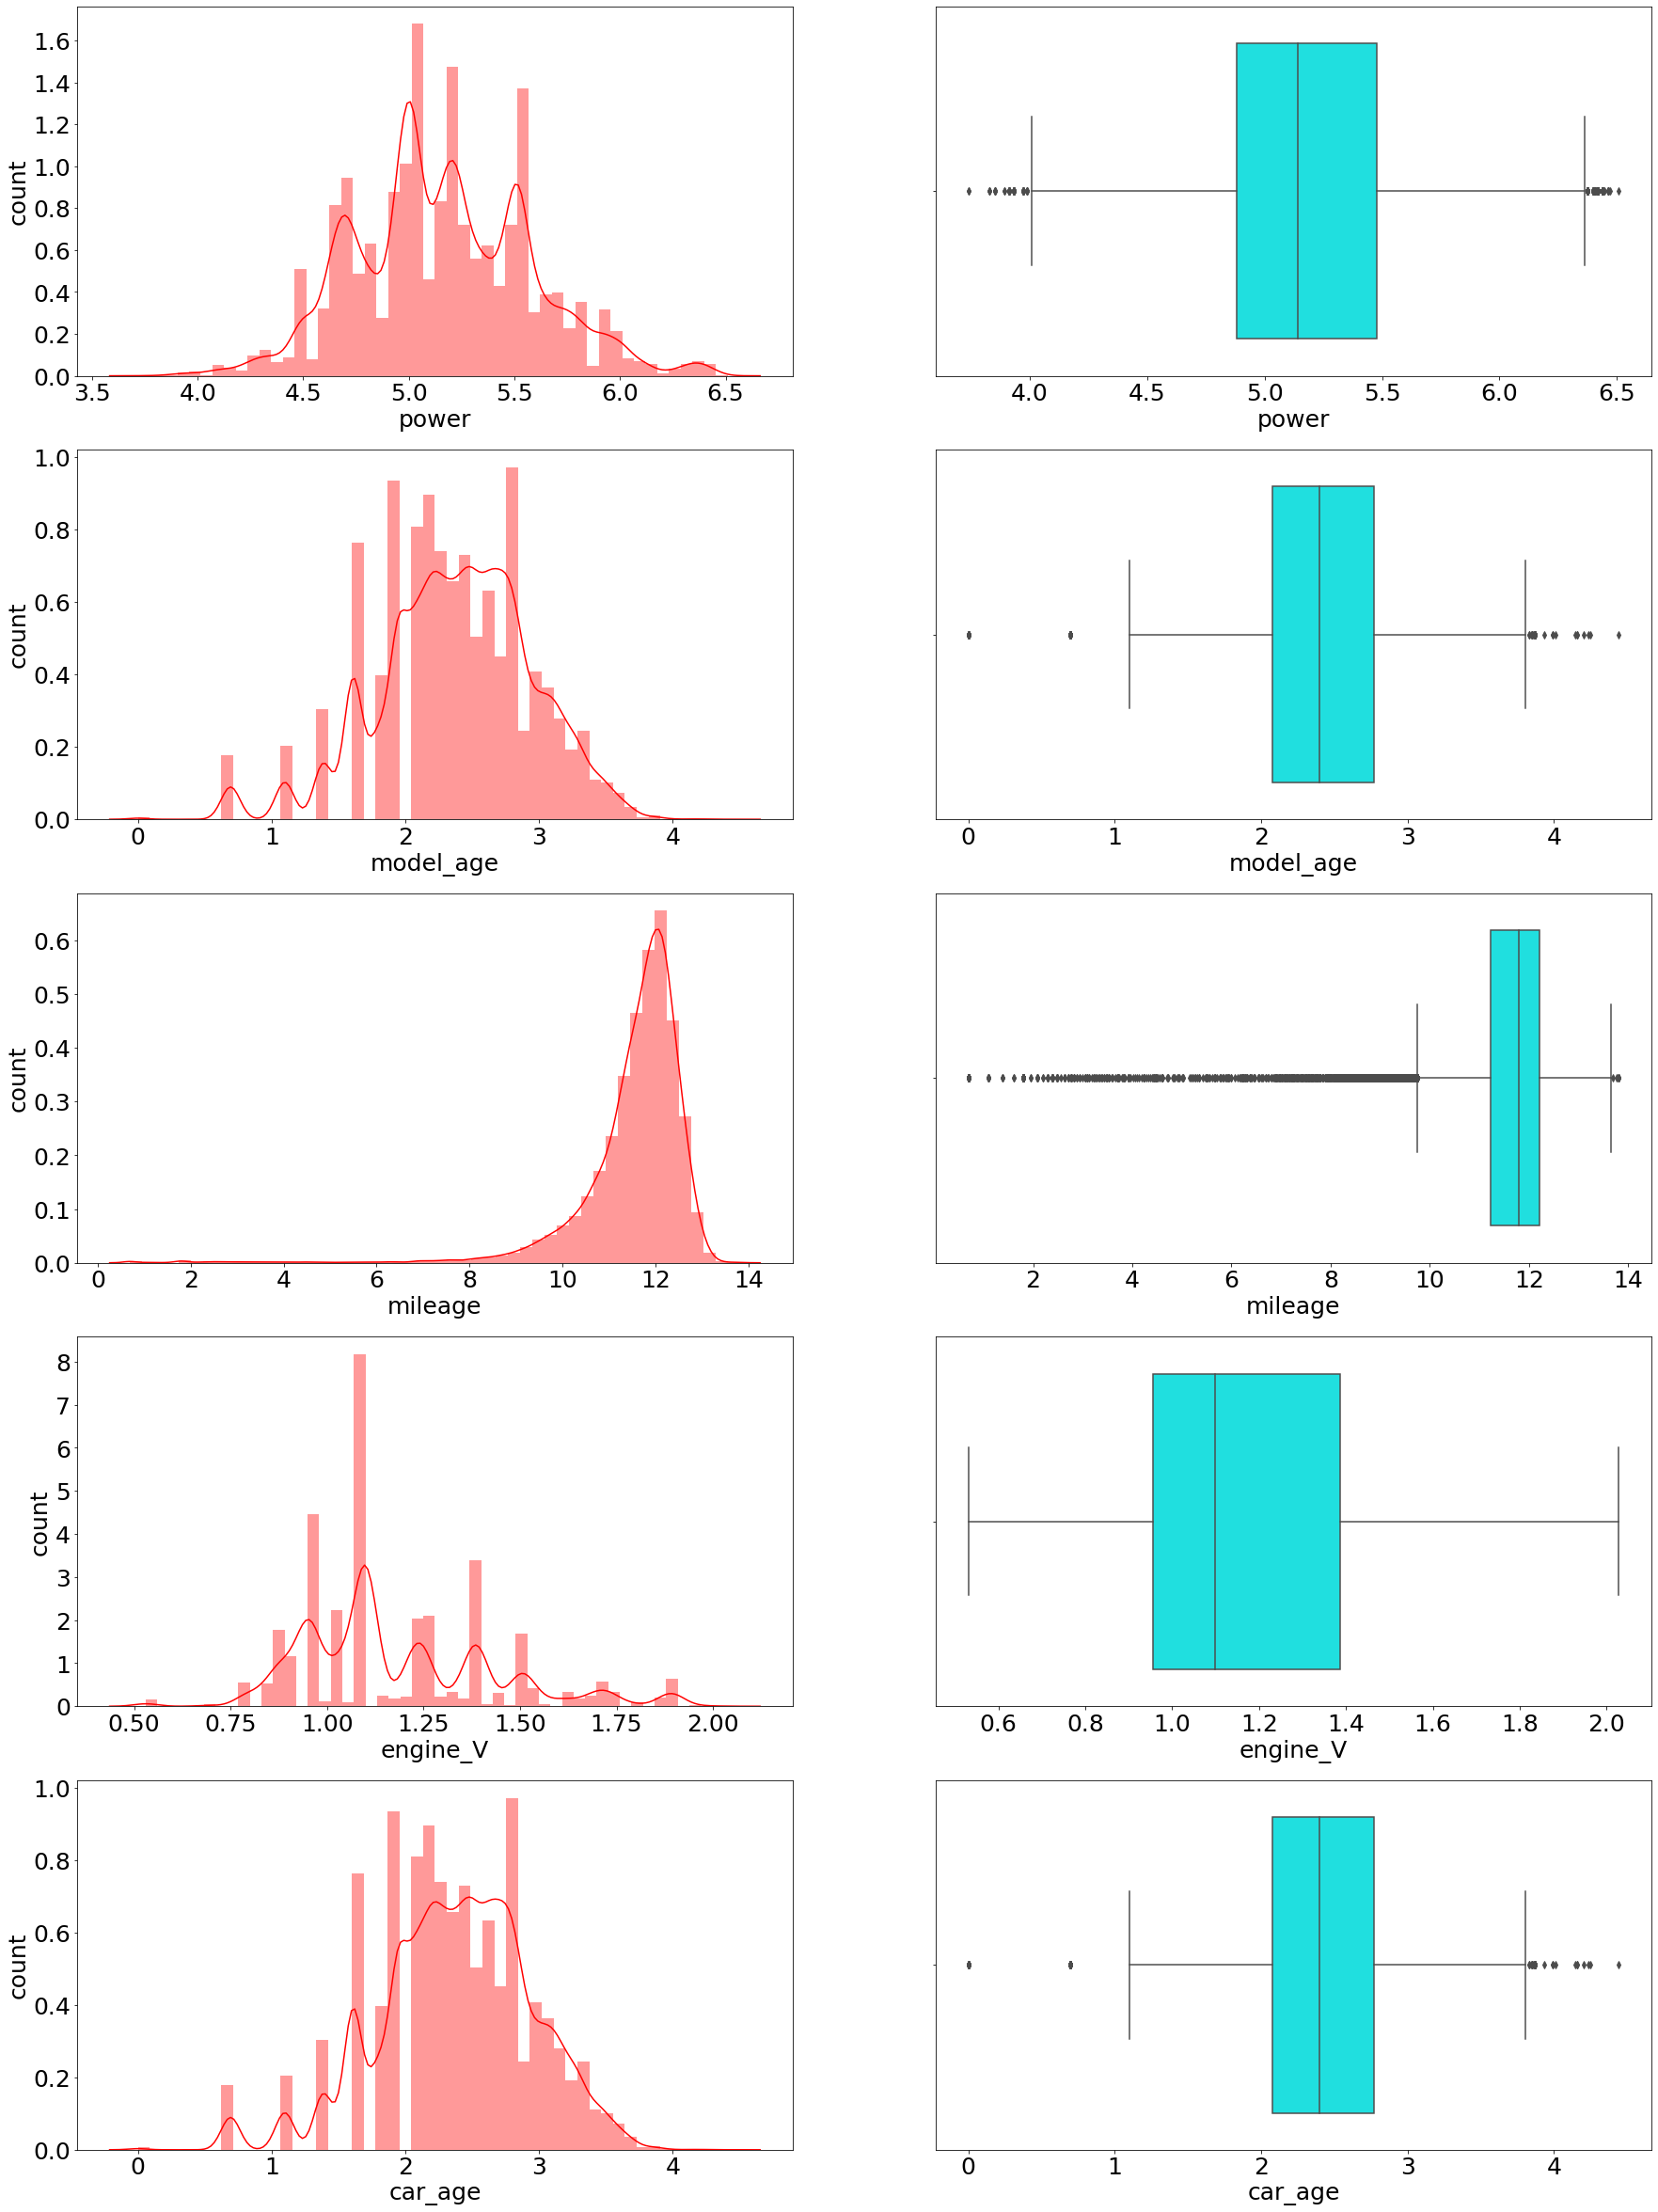

In [19]:
# check if logarythm helped:
i=1
plt.figure(figsize=(30,120))
for col in num_columns:
    plt.subplot(14,2,i)
    sns.distplot(data[data.test_train=="train"][col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(14,2,i)
    sns.boxplot(data[data.test_train=="train"][col],color="cyan")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1

plt.show()


yes, a little bit

### outliers:

exclude outliers from data or not? For now, I don't know I will create 2nd dataset, without outliers and process it in parallel

In [20]:
# remove outliers and save changed data to data_noouts:
# will be saved as a separate dataset
Q1 = data[num_columns].quantile(0.02)
Q3 = data[num_columns].quantile(0.98)
IQR = Q3 - Q1
keep_idx = ~((data[num_columns] < (Q1 - 1.5 * IQR)) | (data[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
remove_idx = ~(keep_idx)
# 2nd dataset without outliers:
data_noouts = data.loc[keep_idx]
data_outliers = data.loc[remove_idx]


In [21]:
# those outliers which belong to test should stay

test_outliers = data_outliers[data_outliers.test_train=="test"]
len(test_outliers)

53

In [22]:
# объединяем
data_noouts = data_noouts.append(test_outliers, sort=False).reset_index(drop=True) 


In [23]:
print(str(len(data_outliers)) + " records have been removed")
data.shape, data_noouts.shape, data_outliers.shape


189 records have been removed


((69951, 25), (69815, 25), (189, 25))

In [24]:
# what kind of cars where removed as outliers:
pd.set_option('display.max_rows', None)
pd.read_csv("PROCESSED/data.csv").loc[remove_idx].head(100)#[["brand", "prod_date"]].head(100)


,brand,model_name,body_type,doors,model_date,prod_date,color,engine_V,power,fuel,...,dataset_year,model_age,new_model,car_age,new_car,retro,raritet,electrocar,petrol_car,1_owner
86,TOYOTA,other,SUV 5 doors.,5,2021,2021,black,3.5,415,petrol,...,2021,0,yes,0,yes,no,no,no,yes,yes
276,TOYOTA,other,SUV 5 doors.,5,2021,2021,black,3.5,415,petrol,...,2021,0,yes,0,yes,no,no,no,yes,yes
374,TOYOTA,Toyota Land Cruiser Prado 150 Series Рестайлинг 3,SUV 5 doors.,5,2020,2021,white,2.8,200,diesel,...,2021,1,no,1,no,no,no,no,no,yes
415,TOYOTA,Toyota Land Cruiser Prado 150 Series Рестайлинг 3,SUV 5 doors.,5,2020,2021,white,2.8,200,diesel,...,2021,1,no,1,no,no,no,no,no,yes
525,TOYOTA,other,SUV 5 doors.,5,2019,2021,white,3.5,249,petrol,...,2021,2,no,2,no,no,no,no,yes,yes
547,TOYOTA,other,sedan,4,2020,2021,black,3.5,249,petrol,...,2021,1,no,1,no,no,no,no,yes,yes
662,TOYOTA,Toyota Land Cruiser Prado 150 Series Рестайлинг 3,SUV 5 doors.,5,2020,2021,black,2.8,200,diesel,...,2021,1,no,1,no,no,no,no,no,yes
749,TOYOTA,Toyota Land Cruiser Prado 150 Series Рестайлинг 3,SUV 5 doors.,5,2020,2021,white,2.8,200,diesel,...,2021,1,no,1,no,no,no,no,no,yes
760,TOYOTA,other,SUV 5 doors.,5,2021,2021,white,3.5,415,petrol,...,2021,0,yes,0,yes,no,no,no,yes,yes
1086,TOYOTA,Toyota Land Cruiser Prado 150 Series Рестайлинг 3,SUV 5 doors.,5,2020,2021,white,4.0,249,petrol,...,2021,1,no,1,no,no,no,no,yes,yes


They are mostly new cars

## categorical features:

In [25]:
cat_columns


['body_type',
 'transmission',
 'brand',
 'fuel',
 'drive',
 'doors',
 'model_name',
 'color',
 'owners']

In [26]:
data[cat_columns].sample(7)


,body_type,transmission,brand,fuel,drive,doors,model_name,color,owners
56659,sedan,AT,TOYOTA,petrol,RWD,4,other,white,3
3898,hatchback 5 doors.,CVT,HONDA,petrol,FWD,5,other,light-blue,1
32318,SUV 5 doors.,AT,LEXUS,petrol,FWD,5,Lexus RX 270 III Рестайлинг,braun,3
38513,sedan,CVT,AUDI,petrol,FWD,4,A4,black,3
13210,minivan,AT,MERCEDES,diesel,4WD,5,Mercedes-Benz V-Класс L 250 d длинный II,white,2
24857,liftback,MT,SKODA,petrol,FWD,5,Skoda Rapid I Рестайлинг,white,2
20024,liftback,AMT,AUDI,petrol,4WD,5,Audi A5 II (F5),grey,2


In [27]:
# categorical features, that will stay in both datasets:
cat_columns_common = ["model_name", "body_type"]

data = to_categories(data, cat_columns_common)
data_noouts = to_categories(data_noouts, cat_columns_common)


In [28]:
cat_columns = list(set(cat_columns) - set(cat_columns_common))
cat_columns


['doors', 'transmission', 'drive', 'color', 'brand', 'fuel', 'owners']

In [29]:
data[cat_columns_common].sample(7)

,model_name,body_type
46049,2,19
9155,78,0
28838,251,19
68222,455,0
57592,322,0
50097,98,0
631,382,0


In [30]:
data_noouts[cat_columns_common].sample(7)


,model_name,body_type
2573,458,8
7245,76,0
65900,309,19
1058,368,19
7776,458,0
5761,146,8
67554,455,0


##  >>> dummies:

process all the rest as dummies to a separate dataset:

In [31]:
dum_columns = cat_columns


In [32]:
data_dum = to_dummies(data, dum_columns)


In [33]:
data_dum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model_name         69951 non-null  int16  
 1   body_type          69951 non-null  int8   
 2   engine_V           69951 non-null  float64
 3   power              69951 non-null  float64
 4   mileage            69951 non-null  float64
 5   pass               69951 non-null  int64  
 6   wheel              69951 non-null  int64  
 7   price              69951 non-null  int64  
 8   test_train         69951 non-null  object 
 9   model_age          69951 non-null  float64
 10  new_model          69951 non-null  int64  
 11  car_age            69951 non-null  float64
 12  new_car            69951 non-null  int64  
 13  retro              69951 non-null  int64  
 14  raritet            69951 non-null  int64  
 15  electrocar         69951 non-null  int64  
 16  petrol_car         699

In [34]:
data_noouts_dum = to_dummies(data_noouts, dum_columns)
data_noouts_dum.sample()


,model_name,body_type,engine_V,power,mileage,pass,wheel,price,test_train,model_age,...,brand__VOLKSWAGEN,brand__VOLVO,fuel__diesel,fuel__electro,fuel__gas,fuel__hybrid,fuel__petrol,owners__1,owners__2,owners__3
48867,307,0,1.386294,5.081404,12.660331,1,0,0,test,2.833213,...,0,0,1,0,0,0,0,0,1,0


In [35]:
data_noouts_dum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69815 entries, 0 to 69814
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model_name         69815 non-null  int16  
 1   body_type          69815 non-null  int8   
 2   engine_V           69815 non-null  float64
 3   power              69815 non-null  float64
 4   mileage            69815 non-null  float64
 5   pass               69815 non-null  int64  
 6   wheel              69815 non-null  int64  
 7   price              69815 non-null  int64  
 8   test_train         69815 non-null  object 
 9   model_age          69815 non-null  float64
 10  new_model          69815 non-null  int64  
 11  car_age            69815 non-null  float64
 12  new_car            69815 non-null  int64  
 13  retro              69815 non-null  int64  
 14  raritet            69815 non-null  int64  
 15  electrocar         69815 non-null  int64  
 16  petrol_car         698

#### data_dummies datasets (with and without outliers) are ready for ML. 

## SAVE DATASETS:

In [36]:
data_dum.to_csv("ML/data_dum.csv", index=False)
data_noouts_dum.to_csv("ML/data_noouts_dum.csv", index=False)


Back to datasets without dummies: data and data_noouts

In [37]:
data[cat_columns].sample(7)


,doors,transmission,drive,color,brand,fuel,owners
11355,5,AT,4WD,grey,NISSAN,petrol,1
16248,4,AT,4WD,blue,INFINITI,petrol,3
18271,4,AT,FWD,red,VOLKSWAGEN,petrol,2
49111,4,MT,FWD,blue,NISSAN,petrol,3
5499,4,AT,FWD,grey,HONDA,petrol,2
64822,5,AT,RWD,grey,BMW,diesel,3
25806,5,AMT,FWD,grey,VOLKSWAGEN,petrol,1


In [38]:
data_noouts[cat_columns].sample(7)


,doors,transmission,drive,color,brand,fuel,owners
22597,5,AMT,FWD,white,SKODA,petrol,2
58302,4,AMT,FWD,white,VOLKSWAGEN,petrol,2
34705,5,AT,4WD,blue,VOLVO,diesel,2
13396,5,AT,4WD,blue,MERCEDES,petrol,1
55192,5,AT,4WD,black,TOYOTA,petrol,1
38785,5,AT,4WD,white,AUDI,diesel,3
56539,4,CVT,FWD,black,TOYOTA,petrol,3


looks good, process both datasets: turn the rest categorical features to numbers


In [39]:
# process:
data = to_categories(data, cat_columns)
data_noouts = to_categories(data_noouts, cat_columns)


In [40]:
data[cat_columns].sample(7)


,doors,transmission,drive,color,brand,fuel,owners
56478,3,1,1,14,9,4,0
29180,4,1,0,14,6,4,2
38729,2,3,1,1,0,4,2
66553,3,1,0,8,11,4,2
13305,4,1,0,1,5,4,0
22104,1,0,0,14,0,4,2
17802,3,1,1,14,10,4,0


In [41]:
data_noouts[cat_columns].sample(7)


,doors,transmission,drive,color,brand,fuel,owners
34291,3,1,1,6,11,4,2
55055,4,1,0,5,9,0,2
55764,3,1,1,0,9,4,2
48600,4,1,1,1,7,4,1
47073,4,2,0,1,7,4,2
32640,4,3,1,1,8,4,1
18210,4,0,1,10,10,4,0


In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         69951 non-null  int8   
 1   model_name    69951 non-null  int16  
 2   body_type     69951 non-null  int8   
 3   doors         69951 non-null  int8   
 4   color         69951 non-null  int8   
 5   engine_V      69951 non-null  float64
 6   power         69951 non-null  float64
 7   fuel          69951 non-null  int8   
 8   mileage       69951 non-null  float64
 9   transmission  69951 non-null  int8   
 10  owners        69951 non-null  int8   
 11  pass          69951 non-null  int64  
 12  drive         69951 non-null  int8   
 13  wheel         69951 non-null  int64  
 14  price         69951 non-null  int64  
 15  test_train    69951 non-null  object 
 16  model_age     69951 non-null  float64
 17  new_model     69951 non-null  int64  
 18  car_age       69951 non-nu

In [43]:
data_noouts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69815 entries, 0 to 69814
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         69815 non-null  int8   
 1   model_name    69815 non-null  int16  
 2   body_type     69815 non-null  int8   
 3   doors         69815 non-null  int8   
 4   color         69815 non-null  int8   
 5   engine_V      69815 non-null  float64
 6   power         69815 non-null  float64
 7   fuel          69815 non-null  int8   
 8   mileage       69815 non-null  float64
 9   transmission  69815 non-null  int8   
 10  owners        69815 non-null  int8   
 11  pass          69815 non-null  int64  
 12  drive         69815 non-null  int8   
 13  wheel         69815 non-null  int64  
 14  price         69815 non-null  int64  
 15  test_train    69815 non-null  object 
 16  model_age     69815 non-null  float64
 17  new_model     69815 non-null  int64  
 18  car_age       69815 non-nu

## SAVE DATASETS:

In [44]:
data.to_csv("ML/data_ML.csv", index=False)
data_noouts.to_csv("ML/data_noouts.csv", index=False)

next >>> 5. ML